In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# MNISTデータセット

《MNISTとは？》

画像分類のための定番データセットで、手書き数字認識を行います。
このデータセットには訓練用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかというラベルが含まれています。

In [15]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

《画像データとは？》

デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。  
一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。  
機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。   
0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。

In [16]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

## 平滑化


(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、 平滑化（flatten） してあるという風に表現します。

In [17]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

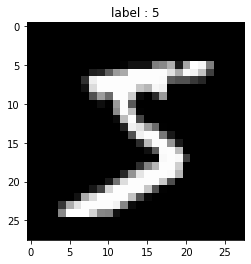

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

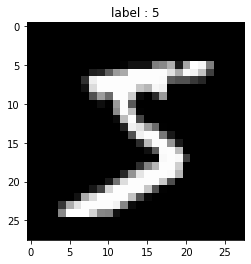

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [19]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

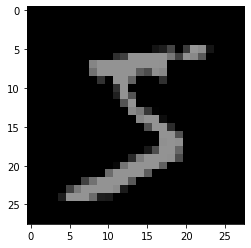

In [20]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

## 前処理


画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [21]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


# ニューラルネットワークスクラッチ

In [55]:
from sklearn.preprocessing import OneHotEncoder
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, n_nodes1, n_nodes2, lr=0.1, epoch=5, batch_size=20, sigma=0.01, activation_func="sigmoid", verbose = True):
        self.verbose = verbose
        self.params = {}
        self.bias = {}
        
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size
        self.sigma = sigma
        
        self.train_loss = []
        self.val_loss = []
        
        if activation_func == "sigmoid":
            self.forward_activation_func = self._sigmoid_forward
            self.backward_activation_func = self._sigmoid_backward
        elif activation_func == "tanh":
            self.forward_activation_func = self._tanh_forward
            self.backward_activation_func = self._tanh_backward
        else:
            raise ValueError("No exists such activation function !!")
        
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        #検証データの損失関数の記録を行うか
        calc_val = (X_val is not None) & (y_val is not None)
        
        #目的変数のone_hot変換
        y = self._one_hot_encoding(y) 
        if calc_val:
            y_val = self._one_hot_encoding(y_val) 
        
        #初期値パラメーターセット
        self._set_parameters(X, y)
        
        #ミニバッチオブジェクト定義
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        
        #学習
        for ep in range(self.epoch):
            for mini_X, mini_y in get_mini_batch:
                #順伝播
                #①階層目＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A1 = mini_X @ self.params["W1"] + self.bias["b1"]
                Z1 = self.forward_activation_func(A1)
                #②階層目＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A2 = Z1 @ self.params["W2"] + self.bias["b2"]
                Z2 = self.forward_activation_func(A2)
                #③階層目＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A3 = Z2 @ self.params["W3"] + self.bias["b3"]
                Z3 = self._softmax(A3)
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

                #逆伝播
                #③層目＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA3 = Z3 - mini_y
                deltaB3 = np.sum(deltaA3, axis=0)
                deltaW3 = Z2.T @ deltaA3

                self.params["W3"] -= self.lr * deltaW3
                self.bias["b3"] -= self.lr * deltaB3
                
                deltaZ2 = deltaA3 @ self.params["W3"].T

                #②層目＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA2 = deltaZ2 * self.backward_activation_func(A2) 
                deltaB2 = np.sum(deltaA2, axis=0)
                deltaW2 = Z1.T @ deltaA2

                self.params["W2"] -= self.lr * deltaW2
                self.bias["b2"] -= self.lr * deltaB2
                
                deltaZ1 = deltaA2 @ self.params["W2"].T
                #①層目＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA1 = deltaZ1 * self.backward_activation_func(A1) 
                deltaB1 = np.sum(deltaA1, axis=0)
                deltaW1 = mini_X.T @ deltaA1

                self.params["W1"] -= self.lr * deltaW1
                self.bias["b1"] -= self.lr * deltaB1
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

            #損失の記録
            tr_loss = self._cross_entropy(self.predict_prob(X), y)
            self.train_loss.append(tr_loss)
            
            if self.verbose:
                    print("Train loss of epoch {}: {}".format(ep, tr_loss))
            
            if calc_val:
                va_loss = self._cross_entropy(self.predict_prob(X_val), y_val)
                self.val_loss.append(va_loss)
                
                
    def predict_prob(self, X):
        #順伝播
        #①階層目＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A1 = X @ self.params["W1"] + self.bias["b1"]
        Z1 = self.forward_activation_func(A1)
        #②階層目＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A2 = Z1 @ self.params["W2"] + self.bias["b2"]
        Z2 = self.forward_activation_func(A2)
        #③階層目＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A3 = Z2 @ self.params["W3"] + self.bias["b3"]
        y = self._softmax(A3)
        #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        
        return y
                
    def predict(self, X):
        y = np.argmax(self.predict_prob(X), axis=1)
        
        return y
    
    def _set_parameters(self, X, y):
        #特徴量の数とクラス数をセット
        self.n_features = X.shape[1] 
        self.n_output = y.shape[1]
        
        #重み初期値
        self.params["W1"] = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.params["W2"] = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.params["W3"] = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        
        #バイアス初期値
        self.bias["b1"] = self.sigma * np.random.randn(self.n_nodes1, )
        self.bias["b2"] = self.sigma * np.random.randn(self.n_nodes2, )
        self.bias["b3"] = self.sigma * np.random.randn(self.n_output, )
    
    def _sigmoid_forward(self, X):
        return 1 / (1 + np.exp(-X))
    
    def _tanh_forward(self, X):
        return np.tanh(X)
    
    def _sigmoid_backward(self, X):
        return (1-self._sigmoid_forward(X)) * self._sigmoid_forward(X)
    
    def _tanh_backward(self, X):
        return (1 - self._tanh_forward(X)**2)
    
    def _softmax(self, X):
        X = X - np.max(X)
        return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)
    
    def _one_hot_encoding(self, y):
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_one_hot = enc.fit_transform(y[:, np.newaxis])
        return y_one_hot

    def _cross_entropy(self, X, y):
        batch_size = len(X)
        delta = 1e-7
        return -np.sum(y * np.log(X+delta)) / batch_size
    

In [25]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

## 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。

重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。

以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。



## 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。

以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

## 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。

多クラス分類の目的関数である交差エントロピー誤差 $L$ は次の数式です。

$L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})$

$y_{ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）


$z_{3_ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの確率（スカラー）


$n_{b}$ : バッチサイズ、batch_size


$n_{c}$ : クラスの数、n_output（今回のMNISTでは10）


サンプル1つあたりの誤差が求まります。

## 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。

数式を以下に示します。

まず、i層目の重みとバイアスの更新式です。 $W_i$ と $B_i$ に対し、更新後の $W_i^{\prime}$ と $B_i^{\prime}$ は次の数式で求められます。

$W_i^{\prime} = W_i - \alpha \frac{\partial L}{\partial W_i} \\
B_i^{\prime} = B_i - \alpha \frac{\partial L}{\partial B_i}$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。


この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。

より効果的な更新方法が知られており、それは次のSprintで扱います。


勾配 $\frac{\partial L}{\partial W_i}$ や $\frac{\partial L}{\partial B_i}$ を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。


「3層目」

$\frac{\partial L}{\partial A_3} = Z_{3} - Y\\
\frac{\partial L}{\partial B_3} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{3\_j}}\\
\frac{\partial L}{\partial W_3} = Z_{2}^{T}\cdot \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T$

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)


$\frac{\partial L}{\partial A_{3_j}}$ : j番目のサンプルの$A_3$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_3}$ : $W_3$ に関する損失 $L$ の勾配 (n_nodes2, n_output)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_nodes2)


$Y$ : 正解ラベル (batch_size, n_output)


$Z_{2}$ : 2層目の活性化関数の出力 (batch_size, n_nodes2)


$W_3$ : 3層目の重み (n_nodes2, n_output)


「2層目」

$\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-tanh^2(A_{2})\}\\
\frac{\partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2\_j}}\\
\frac{\partial L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}\\
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T$

$\frac{\partial L}{\partial A_2}$ : $A_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$\frac{\partial L}{\partial A_{2_j}}$ : j番目のサンプルの$A_2$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_2}$ : $B_2$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_2}$ : $W_2$ に関する損失 $L$ の勾配 (n_nodes1, n_nodes2)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$A_2$ : 2層目の出力 (batch_size, n_nodes2)


$Z_{1}$ : 1層目の活性化関数の出力 (batch_size, n_nodes1)


$W_2$ : 2層目の重み (n_nodes1, n_nodes2)

「1層目」

$\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-tanh^2(A_{1})\}$

$\frac{\partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{1\_j}}$

$\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}$


$\frac{\partial L}{\partial A_1}$ : $A_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$\frac{\partial L}{\partial A_{1_j}}$ : j番目のサンプルの$A_1$ に関する損失 $L$ の勾配 (n_nodes1,)


$\frac{\partial L}{\partial B_1}$ : $B_1$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_1}$ : $W_1$ に関する損失 $L$ の勾配 (n_features, n_nodes1)


$\frac{\partial L}{\partial Z_1}$ : $Z_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$A_1$ : 1層目の出力 (batch_size, n_nodes1)


$X$ : 特徴量ベクトル (batch_size, n_features)


$W_1$ : 1層目の重み (n_features, n_nodes1)


《補足》


活性化関数にシグモイド関数を使用した場合は、次のようになります。

$\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot  \{1-sigmoid(A_{2})\}sigmoid(A_{2})
\\
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot  \{1-sigmoid(A_{1})\}sigmoid(A_{1})$

## 【問題5】推定
推定を行うメソッドを作成してください。

フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

## 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [56]:
nn = ScratchSimpleNeuralNetrowkClassifier(400,200, epoch=30,lr=1e-3)
nn.fit(X_train, y_train, X_test, y_test)

Train loss of epoch 0: 2.3075998426709194
Train loss of epoch 1: 2.3084866035612106
Train loss of epoch 2: 2.307153845805663
Train loss of epoch 3: 2.2202056263494807
Train loss of epoch 4: 1.4966933740860473
Train loss of epoch 5: 1.1232100895775563
Train loss of epoch 6: 0.8781579498616714
Train loss of epoch 7: 0.7240214967532735
Train loss of epoch 8: 0.6475209467794154
Train loss of epoch 9: 0.5791645685136616
Train loss of epoch 10: 0.5256976672692234
Train loss of epoch 11: 0.4855476224513104
Train loss of epoch 12: 0.44990721819133195
Train loss of epoch 13: 0.4147815171781417
Train loss of epoch 14: 0.38368852316403224
Train loss of epoch 15: 0.36017114272628625
Train loss of epoch 16: 0.3426742657527833
Train loss of epoch 17: 0.32890294742948384
Train loss of epoch 18: 0.317366854596459
Train loss of epoch 19: 0.30716331590255075
Train loss of epoch 20: 0.29773775414454057
Train loss of epoch 21: 0.28874612125801913
Train loss of epoch 22: 0.2799796836887156
Train loss of ep

In [57]:
y_pred = nn.predict(X_test)
print("pred:", y_pred)
print("ans:", y_test)
print("accuracy score:", accuracy_score(y_test, y_pred))

pred: [7 2 1 ... 4 5 6]
ans: [7 2 1 ... 4 5 6]
accuracy score: 0.9343


## 【問題7】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。

訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。


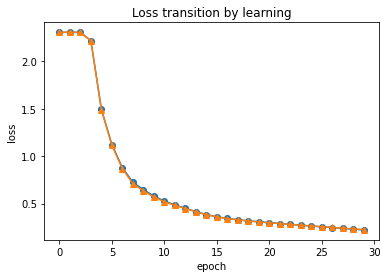

In [60]:
plt.plot(nn.train_loss, marker="o", label="train_loss")
plt.plot(nn.val_loss, marker="^", label="val_loss")
plt.title("Loss transition by learning")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## 【問題8】（アドバンス課題）誤分類の確認
誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

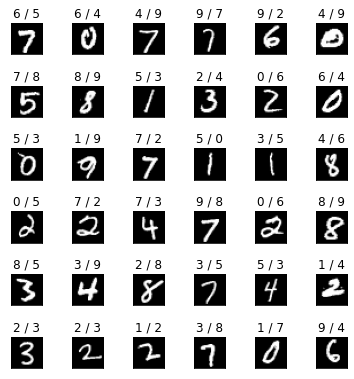

In [64]:
y_val = y_test

"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # いくつ表示するか
true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

誤分類したデータの中にはラベリングがそもそも誤っているものも見受けられる

# テスト

In [65]:
def sigmoid_forwarrd(X):
    return 1 / (1 + np.exp(-X))

def tanh_forwarrd(X):
    return np.tanh(X)

def sigmoid_backward(X):
    return (1- sigmoid_forwarrd(X)) * sigmoid_forwarrd(X)

def tanh_backward(X):
    return (1 - tanh_forwarrd(X)**2)

def softmax(X):
    return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)

def cross_entropy(X, y):
    batch_size = len(X)
    delta = 1e-7
    return -np.sum(y * np.log(X+delta)) / batch_size

In [66]:
XX = np.array([[1,2],[3,4],[5,6],[7,8]])
yy = np.array([0,1,2,3])

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
yy_one_hot = enc.fit_transform(yy[:, np.newaxis])
    
n_nodes1 = 3
n_nodes2 = 2
n_output = yy_one_hot.shape[1]
n_features = XX.shape[1]

bias1 = np.array([-20, -10, -12])
bias2 = np.array([10, 15])
bias3 = np.array([10, 15, -10, -5])

w1 = np.array([[5, 3, 1], [4, 2, 0]])
w2 = np.array([[-4, 3], [-6, 1], [-8, 5]])
w3 = np.array([[-4, 3, -3, 5], [-6, 1, -2, 2]])

A1 = XX @ w1 + bias1
Z1 = sigmoid_forwarrd(A1)

A2 = Z1 @ w2 + bias2
Z2 = sigmoid_forwarrd(A2)

A3 = Z2 @ w3 + bias3
Z3 = softmax(A3)

print(Z3)
print(cross_entropy(Z3, yy_one_hot))


[[5.60518358e-09 9.99999953e-01 1.71453282e-15 4.13943485e-08]
 [1.84068923e-07 9.99999801e-01 3.41908235e-14 1.52646333e-08]
 [1.87920669e-07 9.99999797e-01 3.48031675e-14 1.51745785e-08]
 [2.03760073e-07 9.99999781e-01 3.73029056e-14 1.48277526e-08]]
12.040371604183031


In [ ]:
#１層目
deltaA3 = Z3 - yy_one_hot
deltaB3 = np.sum(deltaA3, axis=0)
deltaW3 = Z2.T @ deltaA3
deltaZ2 = deltaA3 @ w3.T

#２層目
deltaA2 = deltaZ2 * sigmoid_backward(A2) 
deltaB2 = np.sum(deltaA2, axis=0)
deltaW2 = Z1.T @ deltaA2
deltaZ1 = deltaA2 @ w2.T

#３層目
deltaA1 = deltaZ1 * sigmoid_backward(A1) 
deltaB1 = np.sum(deltaA1, axis=0)
deltaW1 = XX.T @ deltaA1


In [ ]:
print("１層目")
print(deltaA3.shape)
print(deltaB3.shape)
print(deltaW3.shape)
print(deltaZ2.shape)
print(w3 - 0.1 * deltaW3)
print()
print("２層目")
print(deltaA2.shape)
print(deltaB2.shape)
print(deltaW2.shape)
print(deltaZ1.shape)
print()
print("３層目")
print(deltaA1.shape)
print(deltaB1.shape)
print(deltaW1.shape)